# Notebook for pretty plots creation

In [2]:
import fiona
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [76]:
path = '/Users/Administrator/Documents/University/Year 3/2b/Thesis/Bachelor-Thesis/data/raw/provinces_nl/BestuurlijkeGebieden_2025.gpkg'
fiona.listlayers(path)

['gemeentegebied', 'landgebied', 'provinciegebied']

In [77]:
gdf = gpd.read_file(path, layer='provinciegebied')

In [78]:
gdf

identificatie           naam code ligt_in_land_code ligt_in_land_naam  \
0           PV22        Drenthe   22              6030         Nederland   
1           PV24      Flevoland   24              6030         Nederland   
2           PV21        Fryslân   21              6030         Nederland   
3           PV25     Gelderland   25              6030         Nederland   
4           PV20      Groningen   20              6030         Nederland   
5           PV31        Limburg   31              6030         Nederland   
6           PV30  Noord-Brabant   30              6030         Nederland   
7           PV27  Noord-Holland   27              6030         Nederland   
8           PV23     Overijssel   23              6030         Nederland   
9           PV26        Utrecht   26              6030         Nederland   
10          PV29        Zeeland   29              6030         Nederland   
11          PV28   Zuid-Holland   28              6030         Nederland   

                                             geometry  
0   MULTIPOLYGON (((231437.815 516445.643, 231430....  
1   MULTIPOLYGON (((157694.139 473920.68, 159406.6...  
2   MULTIPOLYGON (((189491.268 535832.617, 189494....  
3   MULTIPOLYGON (((181361.527 418255.386, 181384....  
4   MULTIPOLYGON (((265275.541 549247.459, 265285....  
5   MULTIPOLYGON (((199549.696 308385.049, 199558....  
6   MULTIPOLYGON (((167812.721 359167.748, 167886....  
7   MULTIPOLYGON (((131700.944 464257.265, 131702....  
8   MULTIPOLYGON (((248291.9 459808.449, 248302.77...  
9   MULTIPOLYGON (((131894.47 429932.357, 131917.5...  
10  MULTIPOLYGON (((50235.786 357928.267, 50243.18...  
11  MULTIPOLYGON (((88397 413853.999, 89142.01 413...

In [ ]:
gdf = gpd.read_file('/Users/Administrator/Documents/University/Year 3/2b/Thesis/Bachelor-Thesis/data/clean/land_use/LGN2008_processed.gpkg')

print(gdf.head())
print(gdf.crs)

gdf.plot()
plt.title("GeoPackage Data")
plt.show()

   code                                           geometry
0    17  POLYGON ((119550 577550, 119550 577525, 119600...
1    17  POLYGON ((119400 577525, 119400 577500, 119475...
2    28  POLYGON ((119475 577525, 119475 577500, 119650...
3    17  POLYGON ((119650 577525, 119650 577500, 119700...
4    17  POLYGON ((118525 577475, 118525 577450, 118550...
EPSG:28992


Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x104e43bb0>>
Traceback (most recent call last):
  File "/Users/Administrator/Documents/University/Year 3/2b/Thesis/Bachelor-Thesis/spatial_env/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


In [16]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="knmi_locator")

stations = ["De Bilt", "Schiphol", "Ell", "Rotterdam Geulhaven"]
coords = {}

for name in stations:
    location = geolocator.geocode(f"{name}, Netherlands")
    if location:
        coords[name] = (location.longitude, location.latitude)

print(coords)

/Users/Administrator/Documents/University/Year 3/2b/Thesis/Bachelor-Thesis/spatial_env/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


{'De Bilt': (5.1737773, 52.1445592), 'Schiphol': (4.7621975, 52.3080392), 'Ell': (5.7949461, 51.2197788), 'Rotterdam Geulhaven': (4.3124116, 51.8895294)}


In [20]:
depth_temp_path = '/Users/Administrator/Documents/University/Year 3/2b/Thesis/Bachelor-Thesis/src/depth_temp.csv'
merged_data_path = '/Users/Administrator/Documents/University/Year 3/2b/Thesis/Bachelor-Thesis/data/aligned/merged_dataset_1.csv'

In [27]:
depth_temp = pd.read_csv(depth_temp_path)
merged_data = pd.read_csv(merged_data_path)

In [26]:
depth_temp["groundwater depth"].isna().sum()

51

In [29]:
merged_data["groundwater depth"].isna().sum()

70

In [3]:
import os
import multiprocessing

print(f"Total logical CPUs: {multiprocessing.cpu_count()}")
print(f"Process ID: {os.getpid()}")

Total logical CPUs: 11
Process ID: 1476


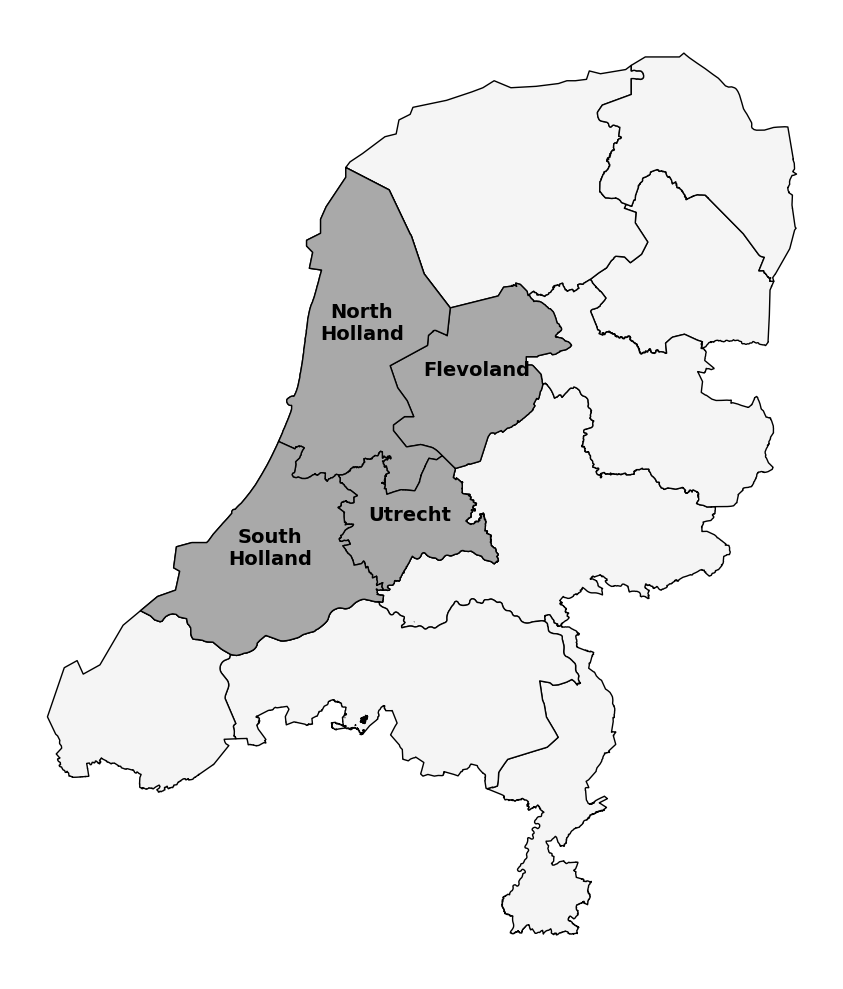

In [7]:
import fiona
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import shape
from geopandas import GeoSeries


with fiona.open("/Users/Administrator/Documents/University/Year 3/2b/Thesis/Bachelor-Thesis/data/raw/provinces_nl/BestuurlijkeGebieden_2025.gpkg", layer="provinciegebied") as src:
    records = list(src)

records[0]['properties']

properties_list = [dict(rec["properties"]) for rec in records]
safe_geometry = GeoSeries([shape(rec["geometry"]) for rec in records], crs="EPSG:28992")

properties_df = pd.DataFrame(properties_list)
provinces_gdf = gpd.GeoDataFrame(properties_df, geometry=safe_geometry)

target_provs = ['Flevoland', 'Utrecht', 'Noord-Holland', 'Zuid-Holland']
target_records = [rec for rec in records if rec["properties"]["naam"] in target_provs]

from shapely.geometry import shape

highlight_geoms = []
highlight_names = []

for rec in target_records:
    try:
        geom = shape(rec["geometry"])
        name = rec["properties"]["naam"]
        highlight_geoms.append(geom)
        highlight_names.append(name)
    except Exception as e:
        print(f"Error converting {rec['properties']['naam']}: {e}")

highlight_gdf = gpd.GeoDataFrame({"naam": highlight_names}, geometry=highlight_geoms, crs="EPSG:28992")

fig, ax = plt.subplots(figsize=(10, 10))

# Step 1: Background map
provinces_gdf.plot(ax=ax, color='whitesmoke', edgecolor='black')

# Step 2: Highlighted provinces
highlight_gdf.plot(ax=ax, color='darkgray', edgecolor='black')

# Step 3: Add labels
name_map = {
    "Noord-Holland": "North\nHolland",
    "Zuid-Holland": "South\nHolland",
    "Utrecht": "Utrecht",
    "Flevoland": "Flevoland"
}

for idx, row in highlight_gdf.iterrows():
    eng_name = name_map.get(row['naam'], row['naam'])
    ax.annotate(
        text=eng_name,
        xy=(row.geometry.centroid.x, row.geometry.centroid.y),
        ha='center',
        fontsize=14,
        weight='bold'
    )

ax.set_axis_off()
plt.tight_layout()
plt.show()

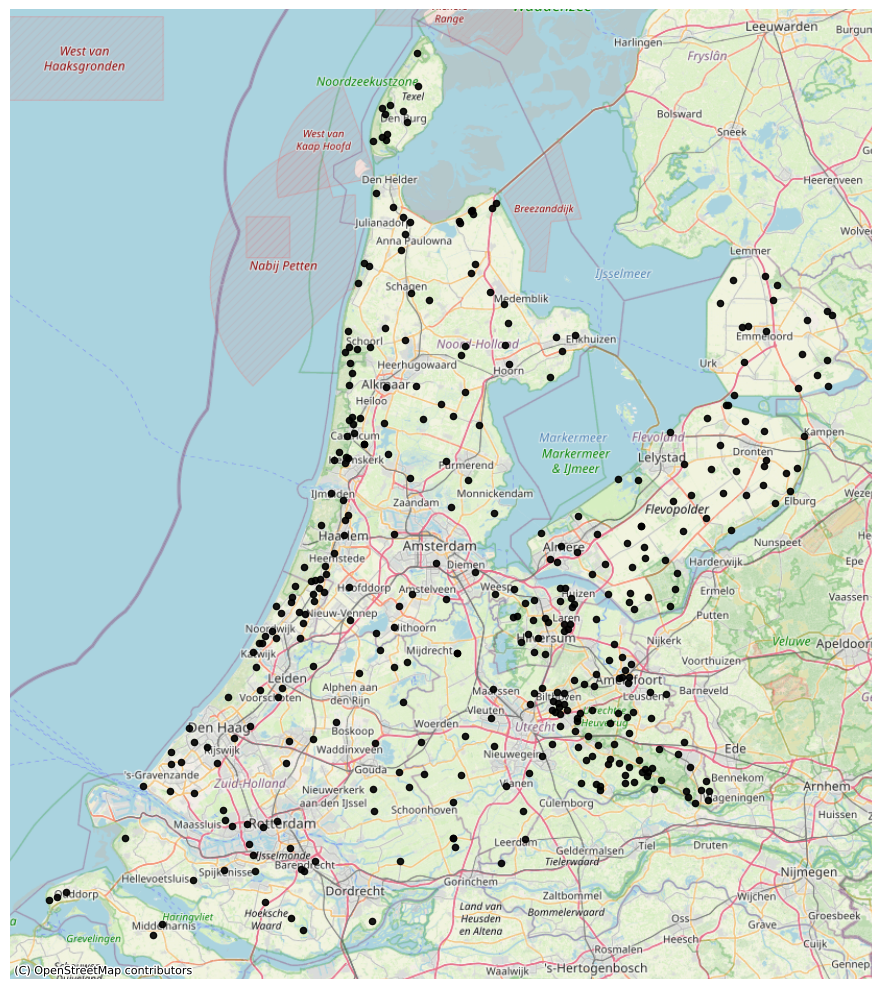

In [2]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import contextily as ctx
import matplotlib.pyplot as plt

path = '/Users/Administrator/Documents/University/Year 3/2b/Thesis/Bachelor-Thesis/data/aligned/merged_dataset_1.csv'
df = pd.read_csv(path)
unique_df = df.drop_duplicates(subset=["lon", "lat"])

geometry = [Point(xy) for xy in zip(unique_df["lon"], unique_df["lat"])]
gdf = gpd.GeoDataFrame(unique_df, geometry=geometry, crs="EPSG:4326").to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, markersize=20, color="black", alpha=0.9)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
ax.set_axis_off()
plt.tight_layout()
plt.show()

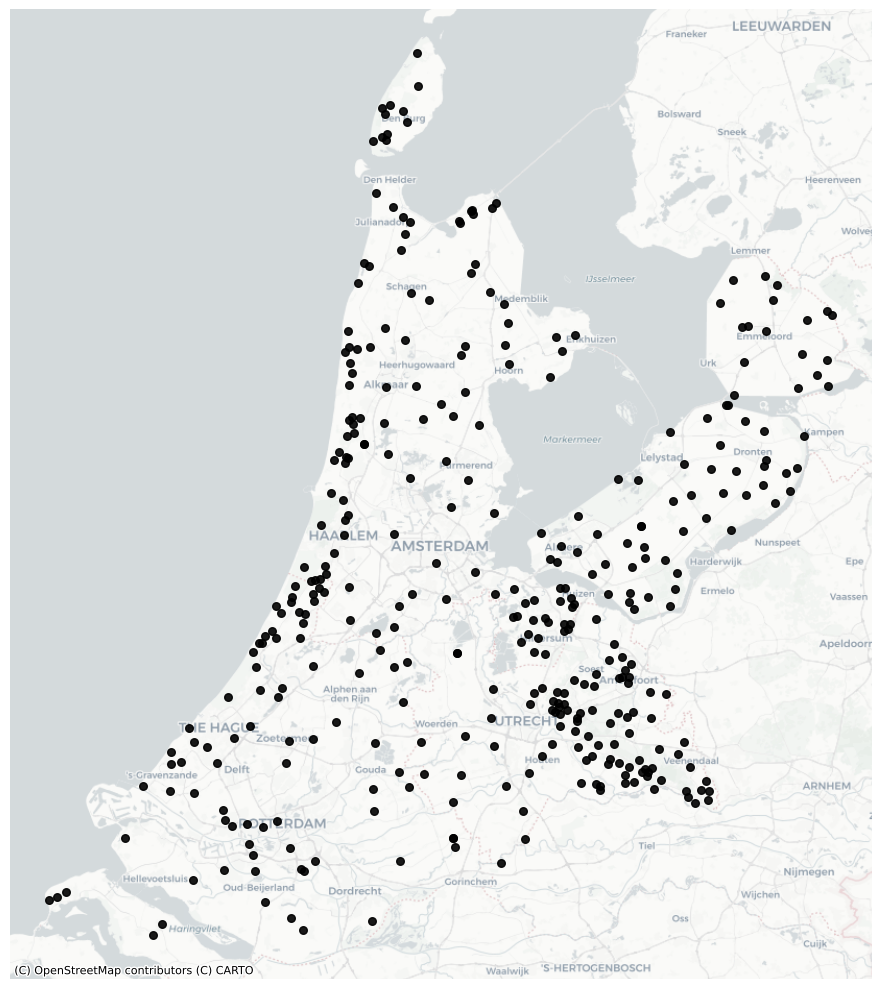

In [14]:
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, markersize=30, color="black", alpha=0.9)
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
ax.set_axis_off()
plt.tight_layout()
plt.show()

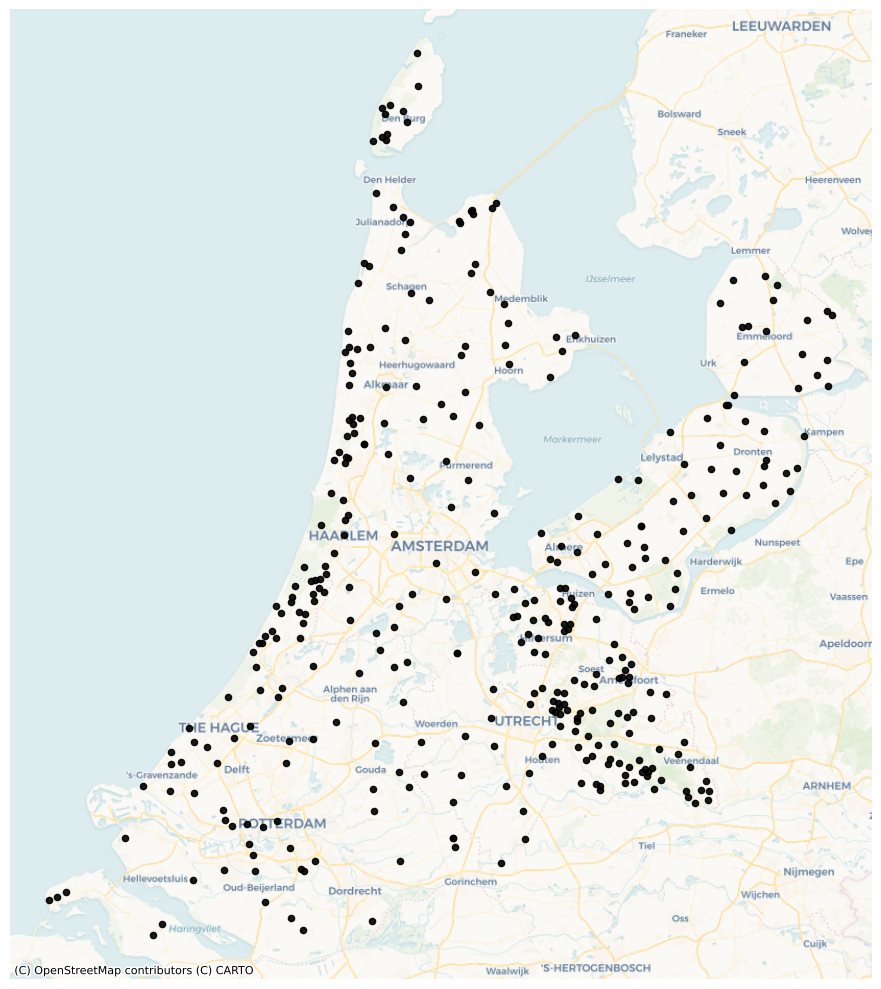

In [12]:
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, markersize=20, color="black", alpha=0.9)

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Voyager, alpha=0.8)

ax.set_axis_off()
plt.tight_layout()
plt.show()

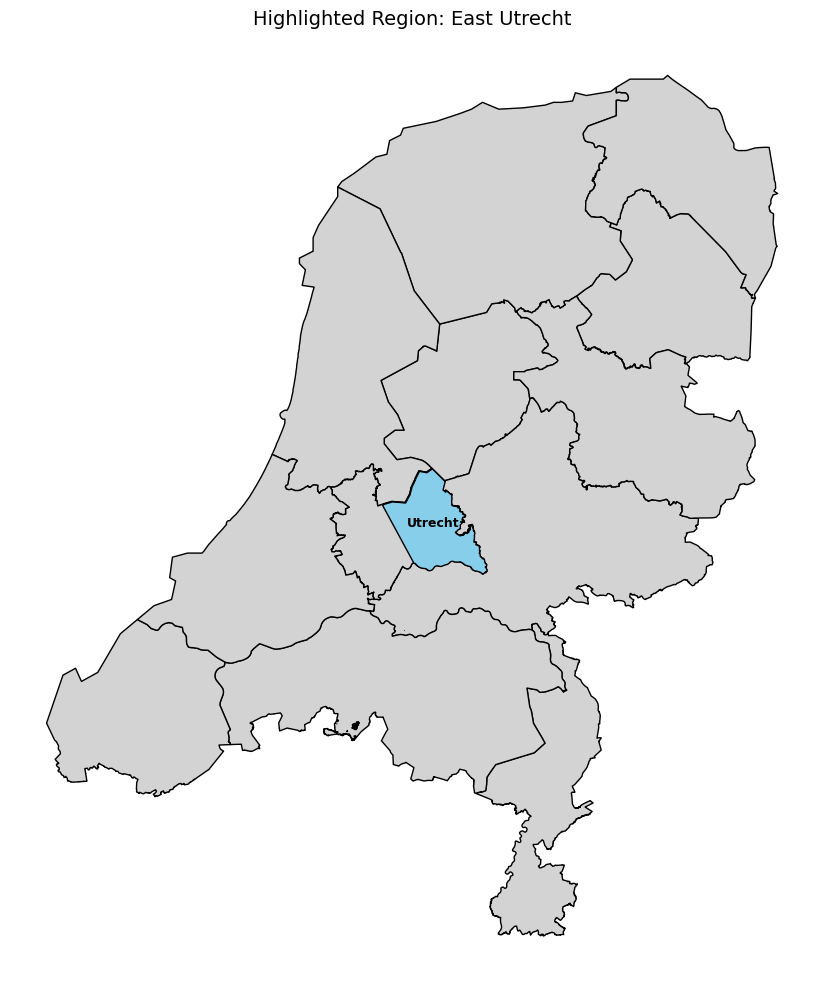

In [24]:
import os
import json
import fiona
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, shape
from geopandas import GeoSeries


with fiona.open("/Users/Administrator/Documents/University/Year 3/2b/Thesis/Bachelor-Thesis/data/raw/provinces_nl/BestuurlijkeGebieden_2025.gpkg", layer="provinciegebied") as src:
    records = list(src)

properties_list = [dict(rec["properties"]) for rec in records]
safe_geometry = GeoSeries([shape(rec["geometry"]) for rec in records], crs="EPSG:28992")
provinces_gdf = gpd.GeoDataFrame(properties_list, geometry=safe_geometry)

def aoi_finder():
    # path to the polygon CSV
    datasetdir = "/Users/Administrator/Documents/University/Year 3/2b/Thesis/Bachelor-Thesis/data/raw"
    utrecht_polygon_path = os.path.join(datasetdir, "utrecht polygon.csv")
    df = pd.read_csv(utrecht_polygon_path, sep=';')

    geo_shape_str = df.loc[0, "Geo Shape"]
    geo_shape = json.loads(geo_shape_str)
    coords = geo_shape["coordinates"][0]
    utrecht_polygon = Polygon(coords)
    x1, y1 = 5.066884, 52.170366
    x2, y2 = 5.237030, 51.978896

    def is_above_line(x, y):
        if x1 == x2:
            return y > y1
        slope = (y2 - y1) / (x2 - x1)
        y_on_line = slope * (x - x1) + y1
        return (y > y_on_line) and (x > x1)

    filtered_coords = [(x, y) for x, y in utrecht_polygon.exterior.coords if is_above_line(x, y)]
    if filtered_coords[0] != filtered_coords[-1]:
        filtered_coords.append(filtered_coords[0])
    aoi = Polygon(filtered_coords)

    utrecht_mask = gpd.GeoDataFrame(geometry=[aoi], crs="EPSG:4326")
    return utrecht_mask

east_utrecht = aoi_finder().to_crs("EPSG:28992")
fig, ax = plt.subplots(figsize=(10, 10))

provinces_gdf.plot(ax=ax, color='lightgrey', edgecolor='black')
east_utrecht.plot(ax=ax, color='skyblue', edgecolor='black')

ax.annotate(
    text='Utrecht',
    xy=(east_utrecht.geometry[0].centroid.x, east_utrecht.geometry[0].centroid.y),
    ha='center',
    fontsize=9,
    weight='bold'
)

ax.set_title("Highlighted Region: East Utrecht", fontsize=14)
ax.set_axis_off()
plt.tight_layout()
plt.show()


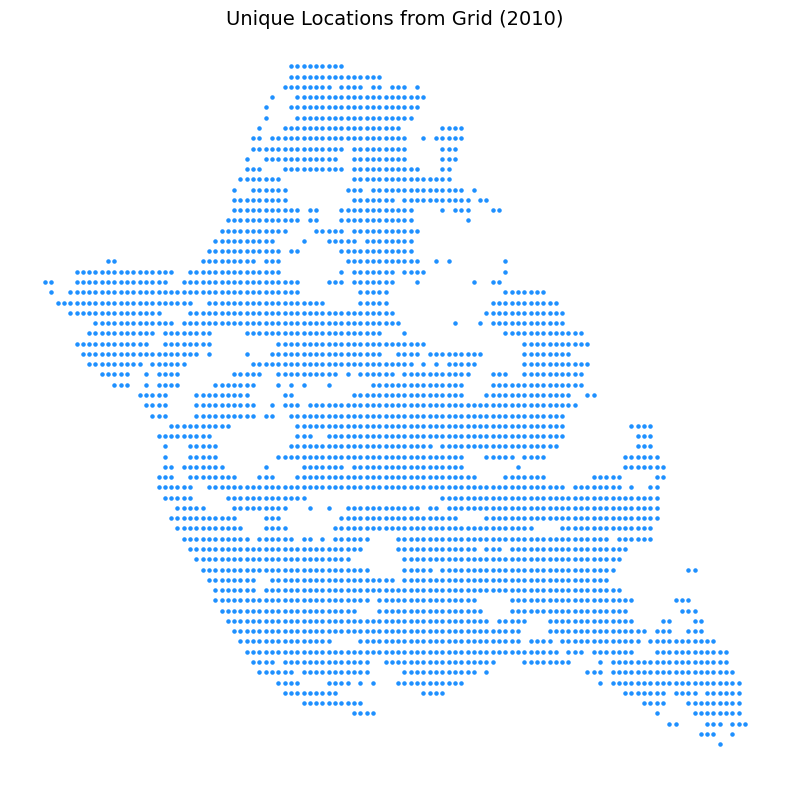

In [27]:
file_path = "/Users/Administrator/Documents/University/Year 3/2b/Thesis/Bachelor-Thesis/data/aligned/grid_2010.csv"
df = pd.read_csv(file_path)

df = df.dropna()

from shapely import wkt

df['geometry'] = df['geometry'].apply(wkt.loads)

unique_points = df.drop_duplicates(subset=["geometry"])

gdf = gpd.GeoDataFrame(unique_points, geometry="geometry", crs="EPSG:4326")

fig, ax = plt.subplots(figsize=(8, 10))
gdf.plot(ax=ax, color="dodgerblue", markersize=5)
ax.set_title("Unique Locations from Grid (2010)", fontsize=14)
ax.set_axis_off()
plt.tight_layout()
plt.show()

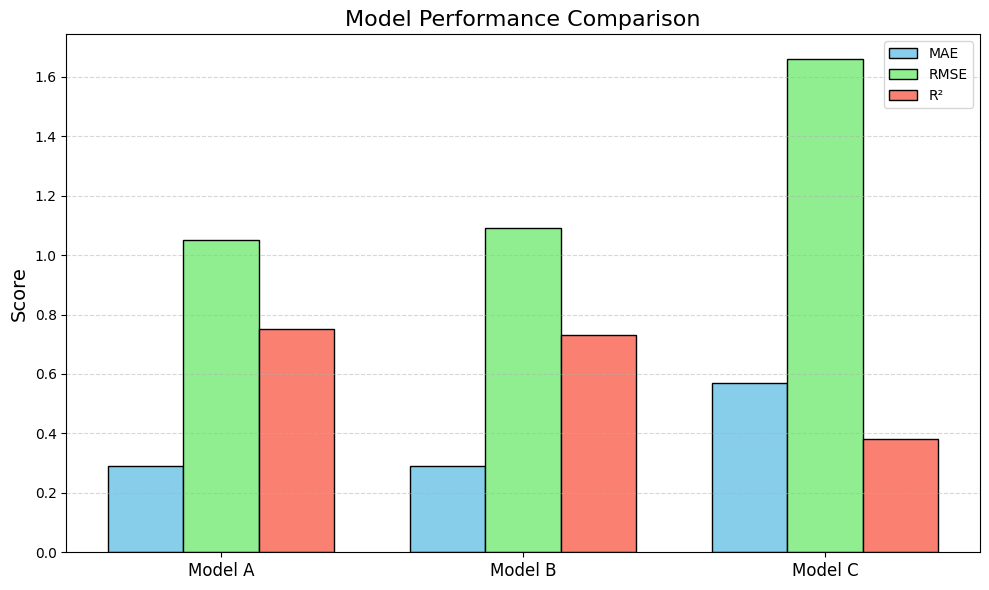

In [30]:
import matplotlib.pyplot as plt
import numpy as np

model_names = ['Model A', 'Model B', 'Model C']
r2_scores = [0.75, 0.73, 0.38]
mae_scores = [0.29, 0.29, 0.57]
rmse_scores = [1.05, 1.09, 1.66]

x = np.arange(len(model_names))
width = 0.25

plt.figure(figsize=(10, 6))
plt.bar(x - width, mae_scores, width, label='MAE', color='skyblue', edgecolor='black')
plt.bar(x, rmse_scores, width, label='RMSE', color='lightgreen', edgecolor='black')
plt.bar(x + width, r2_scores, width, label='R²', color='salmon', edgecolor='black')

plt.xticks(x, model_names, fontsize=12)
plt.ylabel("Score", fontsize=14)
plt.title("Model Performance Comparison", fontsize=16)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


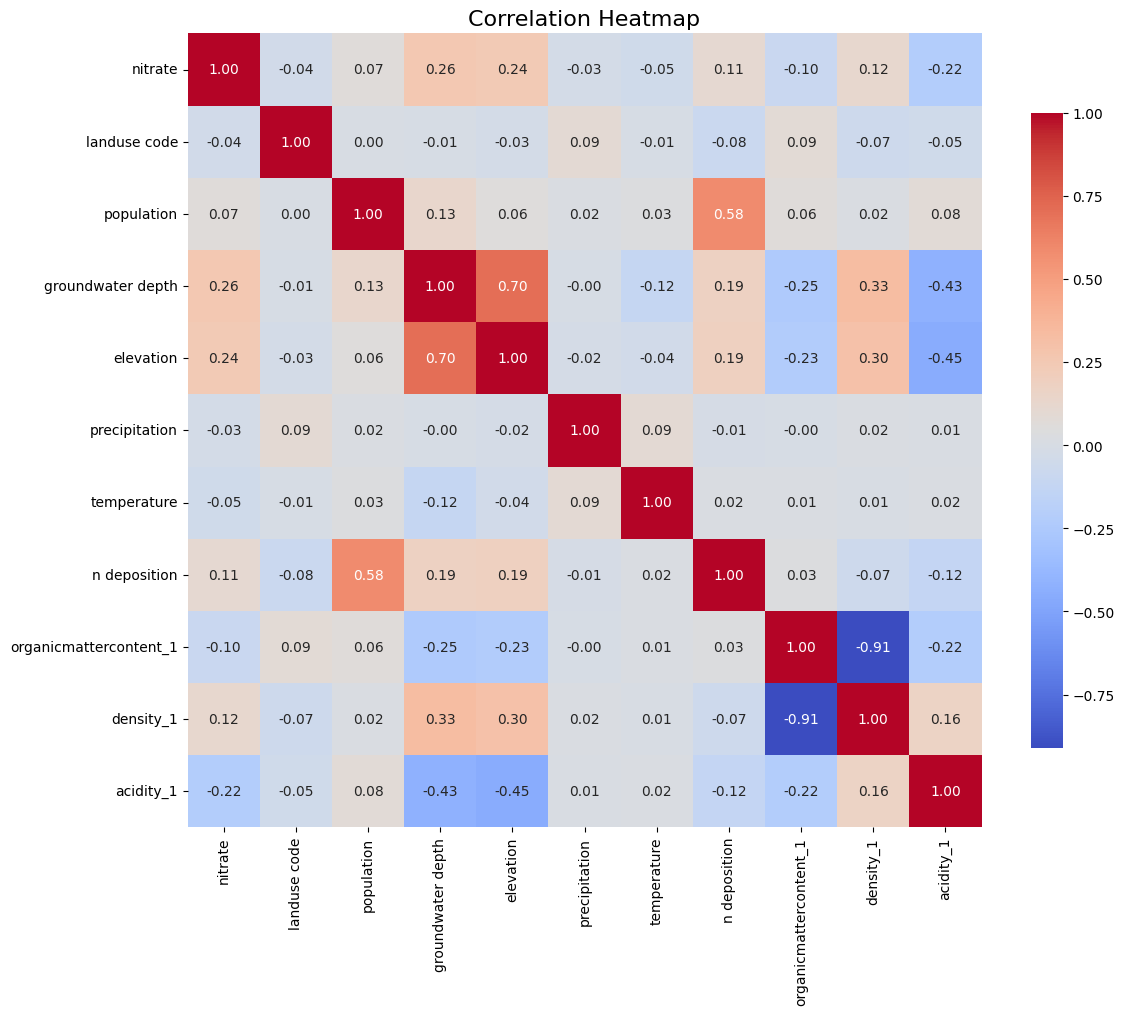

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = '/Users/Administrator/Documents/University/Year 3/2b/Thesis/Bachelor-Thesis/data/aligned/merged_dataset_1.csv'
df = pd.read_csv(file_path)
df = df.drop(columns=['lat', 'lon'])

corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": 0.8})
plt.title("Correlation Heatmap", fontsize=16)
plt.tight_layout()
plt.show()


## Random Forest

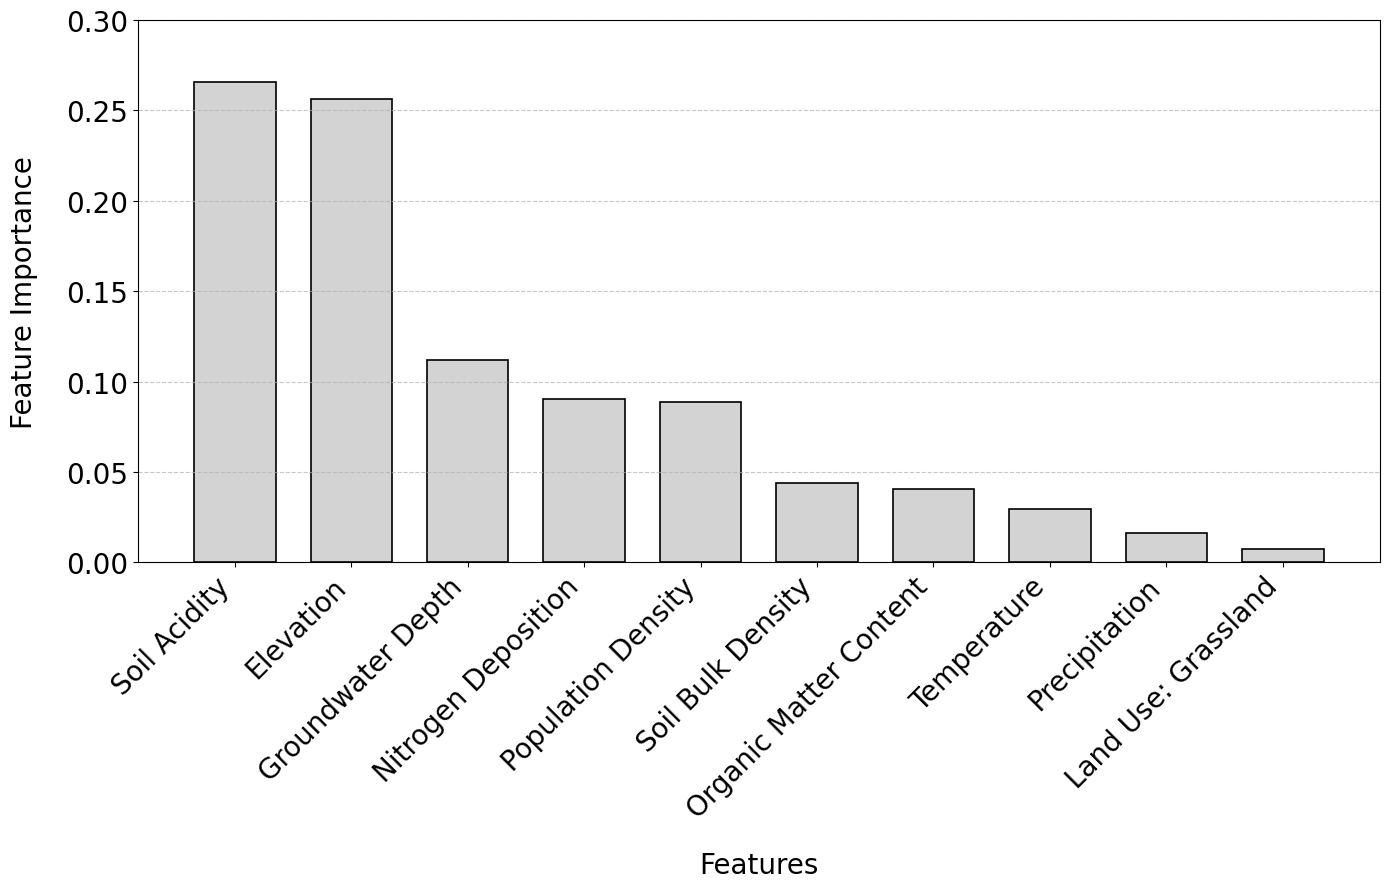

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

data_third = {
    "feature": [
        "num_scaler__acidity_1",
        "num_scaler__elevation",
        "num_scaler__groundwater depth",
        "num_scaler__n deposition",
        "num_scaler__population",
        "num_scaler__density_1",
        "num_scaler__organicmattercontent_1",
        "num_scaler__temperature",
        "num_scaler__precipitation",
        "cat_ohe__landuse code_25.0"
    ],
    "importance": [
        0.2658139,
        0.2564189,
        0.1120802,
        0.09052893,
        0.08886071,
        0.04408797,
        0.04041279,
        0.02963566,
        0.01605268,
        0.007291757
    ]
}

df_third = pd.DataFrame(data_third)

rename_dict_third = {
    "num_scaler__acidity_1": "Soil Acidity",
    "num_scaler__elevation": "Elevation",
    "num_scaler__groundwater depth": "Groundwater Depth",
    "num_scaler__n deposition": "Nitrogen Deposition",
    "num_scaler__population": "Population Density",
    "num_scaler__density_1": "Soil Bulk Density",
    "num_scaler__organicmattercontent_1": "Organic Matter Content",
    "num_scaler__temperature": "Temperature",
    "num_scaler__precipitation": "Precipitation",
    "cat_ohe__landuse code_25.0": "Land Use: Grassland"
}

df_third["feature"] = df_third["feature"].map(rename_dict_third)
df_third_sorted = df_third.sort_values("importance", ascending=False)

plt.figure(figsize=(14, 9))
bars = plt.bar(
    df_third_sorted["feature"],
    df_third_sorted["importance"],
    width=0.7,
    edgecolor="black",
    linewidth=1.2,
    color='lightgray'
)
plt.ylim(0, 0.3)
plt.xlabel("Features", fontsize=20, labelpad=20)
plt.ylabel("Feature Importance", fontsize=20, labelpad=20)
plt.xticks(rotation=45, ha='right', fontsize=20)
plt.yticks(fontsize=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## XGBoost

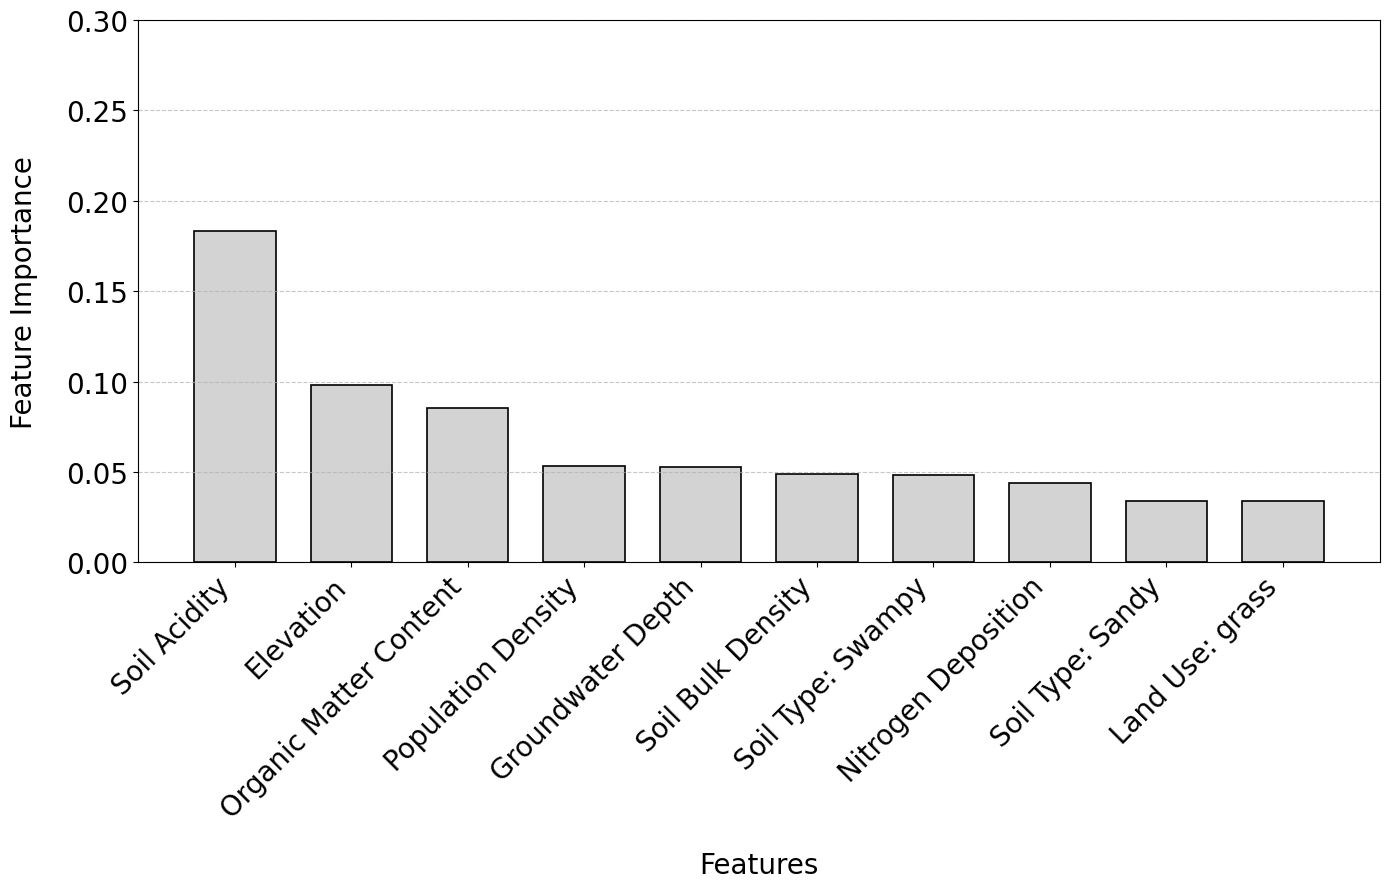

In [6]:
data_fourth = {
    "feature": [
        "num_scaler__acidity_1",
        "num_scaler__elevation",
        "num_scaler__organicmattercontent_1",
        "num_scaler__population",
        "num_scaler__groundwater depth",
        "num_scaler__density_1",
        "cat_ohe__mainsoilclassification_1_Moerige gronden",
        "num_scaler__n deposition",
        "cat_ohe__mainsoilclassification_1_Kalkloze zandgronden",
        "cat_ohe__landuse code_23.0"
    ],
    "importance": [
        0.183023,
        0.098132,
        0.085129,
        0.053342,
        0.052720,
        0.049062,
        0.048448,
        0.043636,
        0.033963,
        0.033713
    ]
}

df_fourth = pd.DataFrame(data_fourth)

# Rename features
rename_dict_fourth = {
    "num_scaler__acidity_1": "Soil Acidity",
    "num_scaler__elevation": "Elevation",
    "num_scaler__organicmattercontent_1": "Organic Matter Content",
    "num_scaler__population": "Population Density",
    "num_scaler__groundwater depth": "Groundwater Depth",
    "num_scaler__density_1": "Soil Bulk Density",
    "num_scaler__n deposition": "Nitrogen Deposition",
    "cat_ohe__mainsoilclassification_1_Moerige gronden": "Soil Type: Swampy",
    "cat_ohe__mainsoilclassification_1_Kalkloze zandgronden": "Soil Type: Sandy",
    "cat_ohe__landuse code_23.0": "Land Use: grass"
}

df_fourth["feature"] = df_fourth["feature"].map(rename_dict_fourth)
df_fourth_sorted = df_fourth.sort_values("importance", ascending=False)

plt.figure(figsize=(14, 9))
bars = plt.bar(
    df_fourth_sorted["feature"],
    df_fourth_sorted["importance"],
    width=0.7,
    edgecolor="black",
    linewidth=1.2,
    color='lightgray'
)

plt.ylim(0, 0.3)
plt.xlabel("Features", fontsize=20, labelpad=20)
plt.ylabel("Feature Importance", fontsize=20, labelpad=20)
plt.xticks(rotation=45, ha='right', fontsize=20)
plt.yticks(fontsize=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Linear Regression

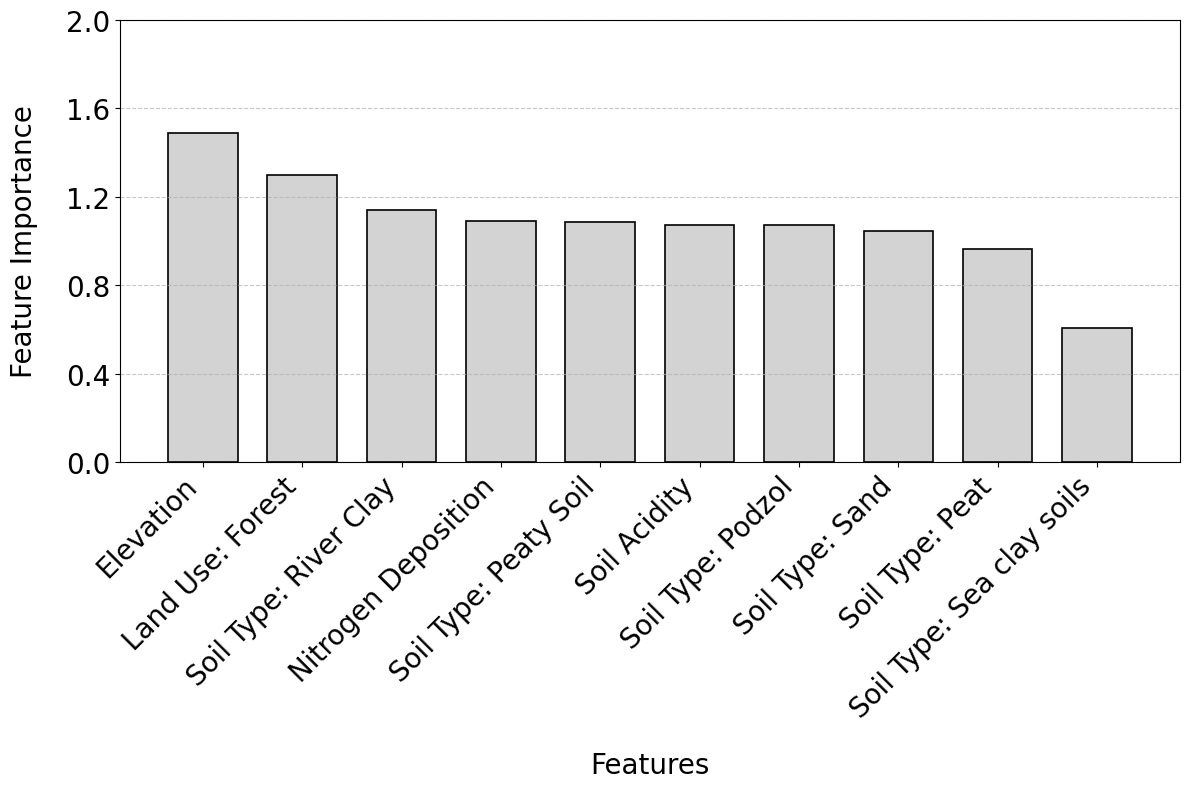

In [24]:
lr_data = {
    "feature": [
        "num_scaler__elevation",
        "cat_ohe__landuse code_20.0",
        "cat_ohe__mainsoilclassification_1_Rivierkleigronden",
        "num_scaler__n deposition",
        "cat_ohe__mainsoilclassification_1_Moerige gronden",
        "num_scaler__acidity_1",
        "cat_ohe__mainsoilclassification_1_Podzolgronden",
        "cat_ohe__mainsoilclassification_1_Kalkloze zandgronden",
        "cat_ohe__mainsoilclassification_1_Veengronden",
        "cat_ohe__mainsoilclassification_1_Zeekleigronden"
    ],
    "coefficient": [
        1.486545,
        1.297439,
        -1.142188,
        1.088519,
        -1.086036,
        -1.074237,
        -1.071149,
        -1.047069,
        -0.965816,
        -0.608141
    ]
}

df_lr = pd.DataFrame(lr_data)
df_lr["abs_coeff"] = df_lr["coefficient"].abs()

rename_dict_lr = {
    "num_scaler__elevation": "Elevation",
    "cat_ohe__landuse code_20.0": "Land Use: Forest",
    "cat_ohe__mainsoilclassification_1_Rivierkleigronden": "Soil Type: River Clay",
    "num_scaler__n deposition": "Nitrogen Deposition",
    "cat_ohe__mainsoilclassification_1_Moerige gronden": "Soil Type: Peaty Soil",
    "num_scaler__acidity_1": "Soil Acidity",
    "cat_ohe__mainsoilclassification_1_Podzolgronden": "Soil Type: Podzol",
    "cat_ohe__mainsoilclassification_1_Kalkloze zandgronden": "Soil Type: Sand",
    "cat_ohe__mainsoilclassification_1_Veengronden": "Soil Type: Peat",
    "cat_ohe__mainsoilclassification_1_Zeekleigronden": "Soil Type: Sea clay soils"
}
df_lr["feature"] = df_lr["feature"].map(rename_dict_lr)

df_lr_sorted = df_lr.sort_values("abs_coeff", ascending=False)

plt.figure(figsize=(12, 8))
bars = plt.bar(
    df_lr_sorted["feature"],
    df_lr_sorted["abs_coeff"],
    width=0.7,
    edgecolor="black",
    linewidth=1.2,
    color='lightgray'
)

plt.ylim(0, 2)
plt.yticks(ticks=[0.0, 0.4, 0.8, 1.2, 1.6, 2], fontsize=20)
plt.xlabel("Features", fontsize=20, labelpad=20)
plt.ylabel("Feature Importance", fontsize=20, labelpad=20)
plt.xticks(rotation=45, ha='right', fontsize=20)
plt.yticks(fontsize=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



## XGBoost (model-agnostic)

/var/folders/fr/h0n611t55y51b_mts5q50l540000gn/T/ipykernel_2139/4033605443.py:44: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.barplot(


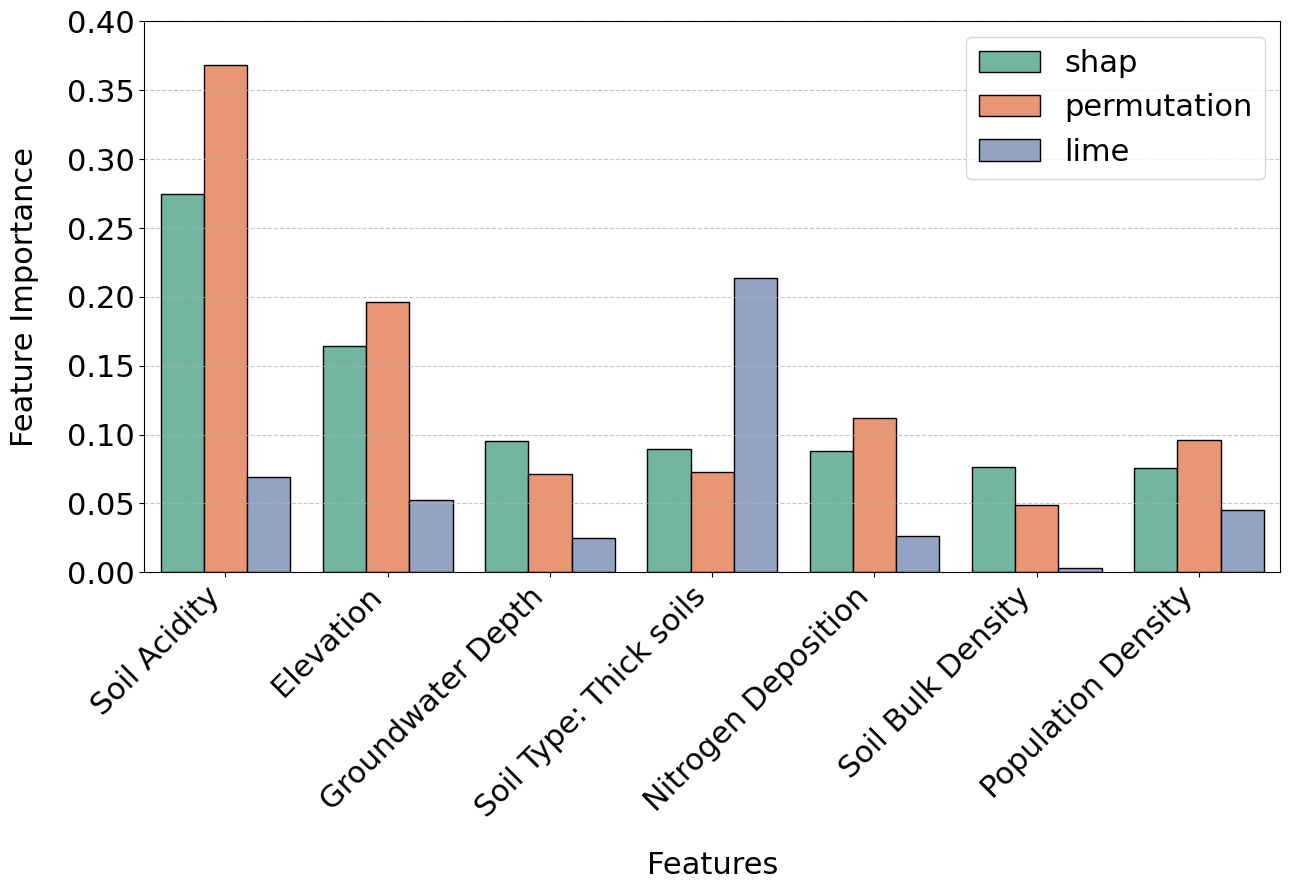

In [200]:
import seaborn as sns
import matplotlib.pyplot as plt

file_path = '/Users/Administrator/Documents/University/Year 3/2b/Thesis/Bachelor-Thesis/notebooks/models/model-agnostic.csv'
df_grouped = pd.read_csv(file_path)

rename_dict = {
    "num_scaler__acidity_1": "Soil Acidity",
    "num_scaler__elevation": "Elevation",
    "num_scaler__groundwater depth": "Groundwater Depth",
    "num_scaler__n deposition": "Nitrogen Deposition",
    "num_scaler__population": "Population Density",
    "num_scaler__density_1": "Soil Bulk Density",
    "num_scaler__organicmattercontent_1": "Organic Matter Content",
    "num_scaler__temperature": "Temperature",
    "num_scaler__precipitation": "Precipitation",
    "cat_ohe__mainsoilclassification_1_Dikke eerdgronden": "Soil Type: Thick soils",
    "cat_ohe__mainsoilclassification_1_Kalkloze zandgronden": "Soil Type: Sandy soils",
    "cat_ohe__mainsoilclassification_1_Moerige gronden": "Soil Type: Swampy grounds",
    "cat_ohe__mainsoilclassification_1_Podzolgronden": "Soil Type: Podzol",
    "cat_ohe__mainsoilclassification_1_Rivierkleigronden": "Soil Type: River Clay",
    "cat_ohe__mainsoilclassification_1_Veengronden": "Soil Type: Peatlands",
    "cat_ohe__mainsoilclassification_1_Zeekleigronden": "Soil Type: Sea clay soils",
    "cat_ohe__landuse code_22.0": "Land Use: Forest",
    "cat_ohe__landuse code_62.0": "Land Use: Fruit farm",
    "cat_ohe__landuse code_23.0": "Land Use: grass",
    "cat_ohe__landuse code_35.0": "Land Use: river sand",
    "cat_ohe__landuse code_45.0": "Land Use: agri grassland",
}

df_grouped["Feature"] = df_grouped["Feature"].map(rename_dict).fillna(df_grouped["Feature"])

top_features = df_grouped.groupby("Feature")["Importance"].mean().sort_values(ascending=False).head(7).index
df_top = df_grouped[df_grouped["Feature"].isin(top_features)]


blue_palette = ["lightsteelblue", "cornflowerblue", "#08519c"]

plt.figure(figsize=(13, 9))
sns.barplot(
    data=df_top,
    x="Feature",
    y="Importance",
    hue="Type",
    edgecolor="black",
    palette=sns.color_palette("Set2")
)

plt.ylim(0, 0.4)
plt.xlabel("Features", fontsize=22, labelpad=20)
plt.ylabel("Feature Importance", fontsize=22, labelpad=20)
plt.xticks(rotation=45, ha='right', fontsize=22)
plt.yticks(fontsize=22)
plt.legend(fontsize=22)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


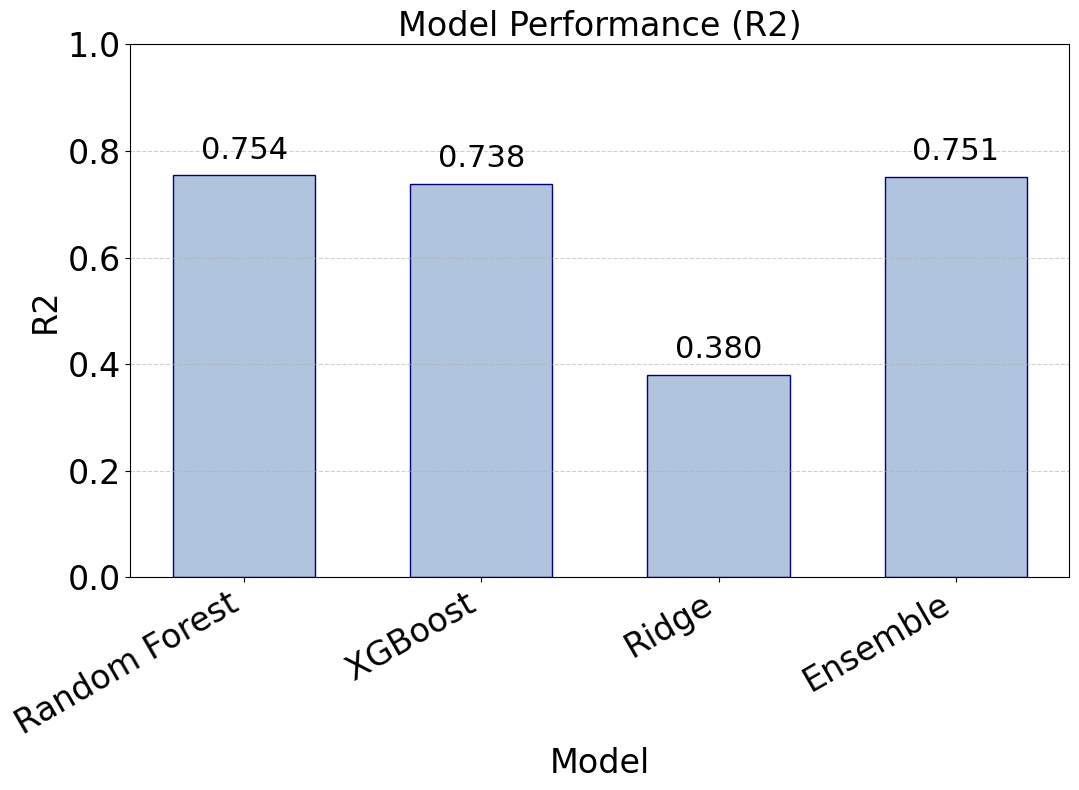

In [162]:
def plot_model_performance(model_names, scores, metric_name: str = "R2"):
    plt.figure(figsize=(11, 8))

    bar_width = 0.6
    bars = plt.bar(
        model_names,
        scores,
        width=bar_width,
        color='lightsteelblue',
        edgecolor='navy',
        linewidth=1
    )

    plt.ylabel(metric_name, fontsize=24)
    plt.xlabel("Model", fontsize=24)
    plt.title(f"Model Performance ({metric_name})", fontsize=24)

    plt.ylim(0, 1)

    plt.xticks(rotation=30, ha='right', fontsize=24)
    plt.yticks(fontsize=24)
    plt.grid(axis='y', linestyle='--', alpha=0.6)

    for bar, score in zip(bars, scores):
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.02,
            f"{score:.3f}",
            ha='center',
            va='bottom',
            fontsize=22
        )

    plt.tight_layout()
    plt.show()

model_names = ['Random Forest', 'XGBoost', 'Ridge', 'Ensemble']
scores = [0.754, 0.738, 0.38, 0.751]

plot_model_performance(model_names, scores)

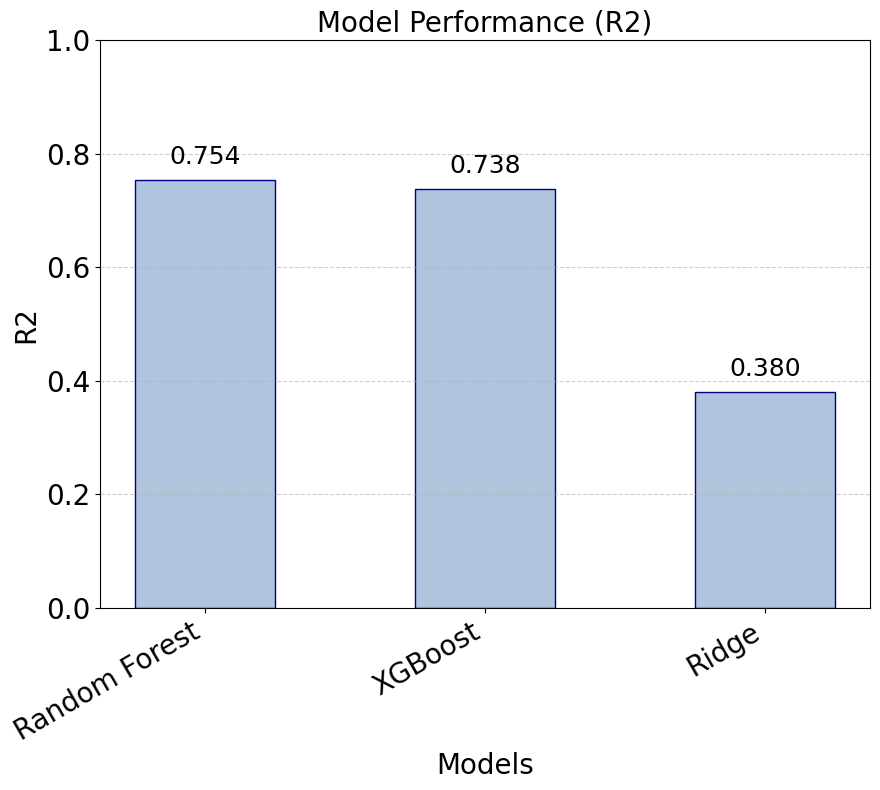

In [51]:
def plot_model_performance(model_names, scores, metric_name: str = "R2"):
    plt.figure(figsize=(9, 8))

    bar_width = 0.5
    bars = plt.bar(
        model_names,
        scores,
        width=bar_width,
        color='lightsteelblue',
        edgecolor='navy',
        linewidth=1
    )

    plt.ylabel(metric_name, fontsize=20)
    plt.xlabel("Models", fontsize=20)
    plt.title(f"Model Performance ({metric_name})", fontsize=20)

    plt.ylim(0, 1)  # Fixed y-axis range for R²

    plt.xticks(rotation=30, ha='right', fontsize=20)
    plt.yticks(fontsize=20)
    plt.grid(axis='y', linestyle='--', alpha=0.6)

    for bar, score in zip(bars, scores):
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.02,
            f"{score:.3f}",
            ha='center',
            va='bottom',
            fontsize=18
        )

    plt.tight_layout()
    plt.show()


model_names = ['Random Forest', 'XGBoost', 'Ridge']
scores = [0.754, 0.738, 0.38]

plot_model_performance(model_names, scores)

In [31]:
rf_residuals = pd.read_csv('/Users/Administrator/Documents/University/Year 3/2b/Thesis/Bachelor-Thesis/notebooks/models/rf_residuals.csv')
xgb_residuals = pd.read_csv('/Users/Administrator/Documents/University/Year 3/2b/Thesis/Bachelor-Thesis/notebooks/models/xgb_residuals.csv')

rf_res = rf_residuals.iloc[:, 1]
xgb_res = xgb_residuals.iloc[:, 1]

correlation = rf_res.corr(xgb_res)
correlation


0.9740365587572397

In [37]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

y_test = pd.read_csv('/Users/Administrator/Documents/University/Year 3/2b/Thesis/Bachelor-Thesis/src/y_test.csv')
all_preds = pd.read_csv('/Users/Administrator/Documents/University/Year 3/2b/Thesis/Bachelor-Thesis/src/all_preds.csv')

y_true = y_test.iloc[:, 0]

y_pred_ensemble = all_preds["Ensemble"]
y_pred_rf = all_preds["RandomForestRegressor"]
y_pred_xgb = all_preds["XGBRegressor"]
y_pred_lr = all_preds["Ridge"]

ens_mae = mean_absolute_error(y_true, y_pred_ensemble)
ens_rmse = sqrt(mean_squared_error(y_true, y_pred_ensemble))
ens_r2 = r2_score(y_true, y_pred_ensemble)

rf_mae = mean_absolute_error(y_true, y_pred_rf)
rf_rmse = sqrt(mean_squared_error(y_true, y_pred_rf))
rf_r2 = r2_score(y_true, y_pred_rf)

xgb_mae = mean_absolute_error(y_true, y_pred_xgb)
xgb_rmse = sqrt(mean_squared_error(y_true, y_pred_xgb))
xgb_r2 = r2_score(y_true, y_pred_xgb)

lr_mae = mean_absolute_error(y_true, y_pred_lr)
lr_rmse = sqrt(mean_squared_error(y_true, y_pred_lr))
lr_r2 = r2_score(y_true, y_pred_lr)

results = {
    "Ensemble": {"R²": ens_r2, "MAE": ens_mae, "RMSE": ens_rmse},
    "Random Forest": {"R²": rf_r2, "MAE": rf_mae, "RMSE": rf_rmse},
    "XGBoost": {"R²": xgb_r2, "MAE": xgb_mae, "RMSE": xgb_rmse},
    "Ridge": {"R²": lr_r2, "MAE": lr_mae, "RMSE": lr_rmse}
}

results

{'Ensemble': {'R²': 0.7513729156551703,
  'MAE': 0.2866188371430996,
  'RMSE': 1.0513118941153583},
 'Random Forest': {'R²': 0.7544759261738765,
  'MAE': 0.2942082575770322,
  'RMSE': 1.044730803946869},
 'XGBoost': {'R²': 0.7381940578523067,
  'MAE': 0.29346007551299436,
  'RMSE': 1.0788153297583318},
 'Ridge': {'R²': 0.3805587995012577,
  'MAE': 0.5694627181696394,
  'RMSE': 1.6594241390574733}}

In [ ]:
y_pred_rf = all_preds["Random Forest"]
y_pred_xgb = all_preds["XGBoost"]

rf_mae = mean_absolute_error(y_true, y_pred_rf)
rf_rmse = sqrt(mean_squared_error(y_true, y_pred_rf))

xgb_mae = mean_absolute_error(y_true, y_pred_xgb)
xgb_rmse = sqrt(mean_squared_error(y_true, y_pred_xgb))

{
    "Random Forest": {"MAE": rf_mae, "RMSE": rf_rmse},
    "XGBoost": {"MAE": xgb_mae, "RMSE": xgb_rmse}
}

In [193]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

rf_data = {
    "feature": [
        "Soil Acidity",
        "Elevation",
        "Groundwater Depth",
        "Nitrogen Deposition",
        "Population Density",
        "Soil Bulk Density",
        "Organic Matter",
        "Temperature",
        "Precipitation",
        "Land Use: Grassland"
    ],
    "importance": [
        0.2658139,
        0.2564189,
        0.1120802,
        0.09052893,
        0.08886071,
        0.04408797,
        0.04041279,
        0.02963566,
        0.01605268,
        0.007291757
    ]
}
df_rf = pd.DataFrame(rf_data)
df_rf["model"] = "Random Forest"
df_rf["norm_importance"] = df_rf["importance"] / df_rf["importance"].max()

# XGBoost
xgb_data = {
    "feature": [
        "Soil Acidity",
        "Elevation",
        "Organic Matter",
        "Population Density",
        "Groundwater Depth",
        "Soil Bulk Density",
        "Soil Type: Swampy",
        "Nitrogen Deposition",
        "Soil Type: Sandy",
        "Land Use: grass"
    ],
    "importance": [
        0.183023,
        0.098132,
        0.085129,
        0.053342,
        0.052720,
        0.049062,
        0.048448,
        0.043636,
        0.033963,
        0.033713
    ]
}
df_xgb = pd.DataFrame(xgb_data)
df_xgb["model"] = "XGBoost"
df_xgb["norm_importance"] = df_xgb["importance"] / df_xgb["importance"].max()

# Linear Regression
lr_data = {
    "feature": [
        "Elevation",
        "Land Use: Forest",
        "Soil Type: River Clay",
        "Nitrogen Deposition",
        "Soil Type: Peaty Soil",
        "Soil Acidity",
        "Soil Type: Podzol",
        "Soil Type: Sand",
        "Soil Type: Peat",
        "Soil Type: Sea clay soils"
    ],
    "importance": [
        1.486545,
        1.297439,
        1.142188,
        1.088519,
        1.086036,
        1.074237,
        1.071149,
        1.047069,
        0.965816,
        0.608141
    ]
}
df_lr = pd.DataFrame(lr_data)
df_lr["model"] = "Linear Regression"
df_lr["norm_importance"] = df_lr["importance"].abs() / df_lr["importance"].abs().max()

df_all = pd.concat([df_lr[["feature", "model", "norm_importance"]],
                    df_rf[["feature", "model", "norm_importance"]],
                    df_xgb[["feature", "model", "norm_importance"]]])

ordered_features = [
    "Soil Acidity",
    "Elevation",
    "Nitrogen Deposition",
    "Organic Matter",
    "Groundwater Depth",
    "Population Density",
    "Soil Bulk Density"
]
df_filtered = df_all[df_all["feature"].isin(ordered_features)]

df_filtered["feature"] = pd.Categorical(df_filtered["feature"], categories=ordered_features, ordered=True)
df_filtered = df_filtered.sort_values("feature")


/var/folders/fr/h0n611t55y51b_mts5q50l540000gn/T/ipykernel_2139/2229070152.py:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["feature"] = pd.Categorical(df_filtered["feature"], categories=ordered_features, ordered=True)


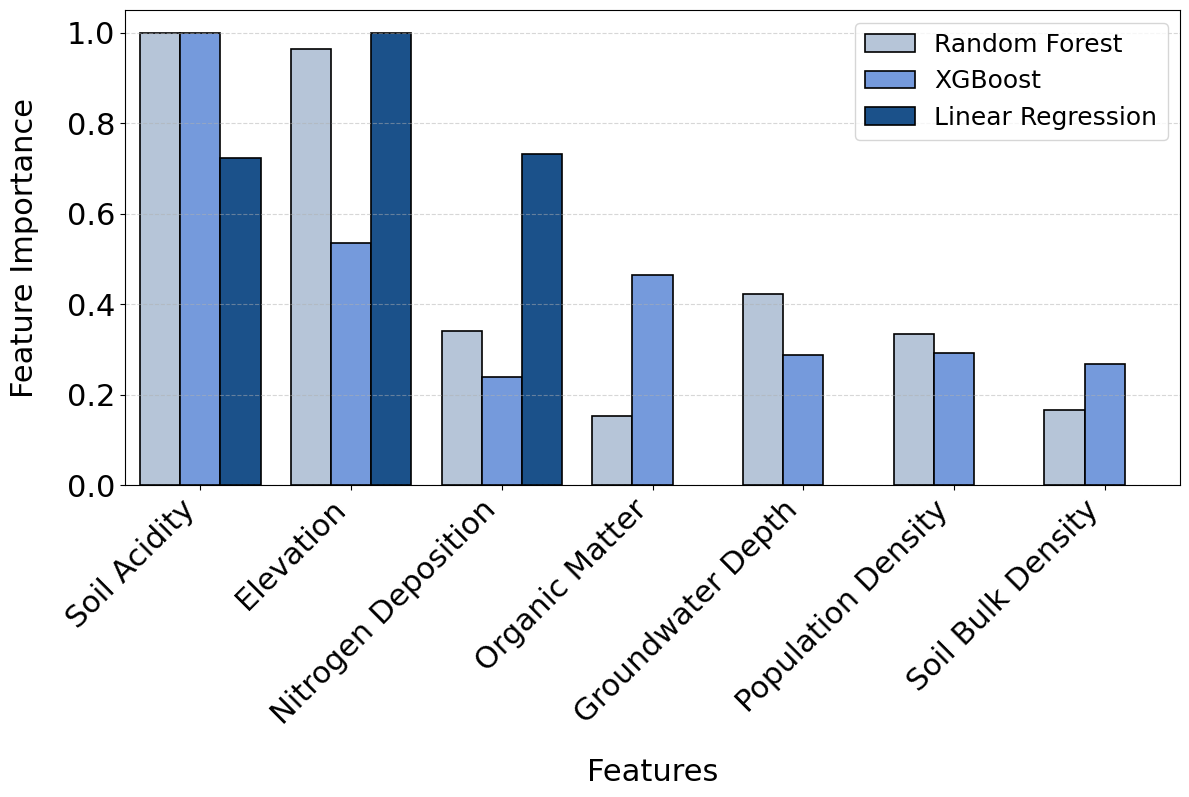

In [198]:
blue_palette = ["lightsteelblue", "cornflowerblue",  "#08519c"]
hue_order=["Random Forest", "XGBoost", "Linear Regression"]

plt.figure(figsize=(12, 9))
sns.barplot(
    data=df_filtered,
    x="feature",
    y="norm_importance",
    hue="model",
    hue_order=["Random Forest", "XGBoost", "Linear Regression"],
    palette=blue_palette,
    edgecolor="black",
    linewidth=1.2
)

plt.xlabel("Features", fontsize=22, labelpad=20)
plt.ylabel("Feature Importance", fontsize=22, labelpad=20)
plt.xticks(rotation=45, ha='right', fontsize=22)
plt.yticks(fontsize=22)
plt.legend(fontsize=18)
plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

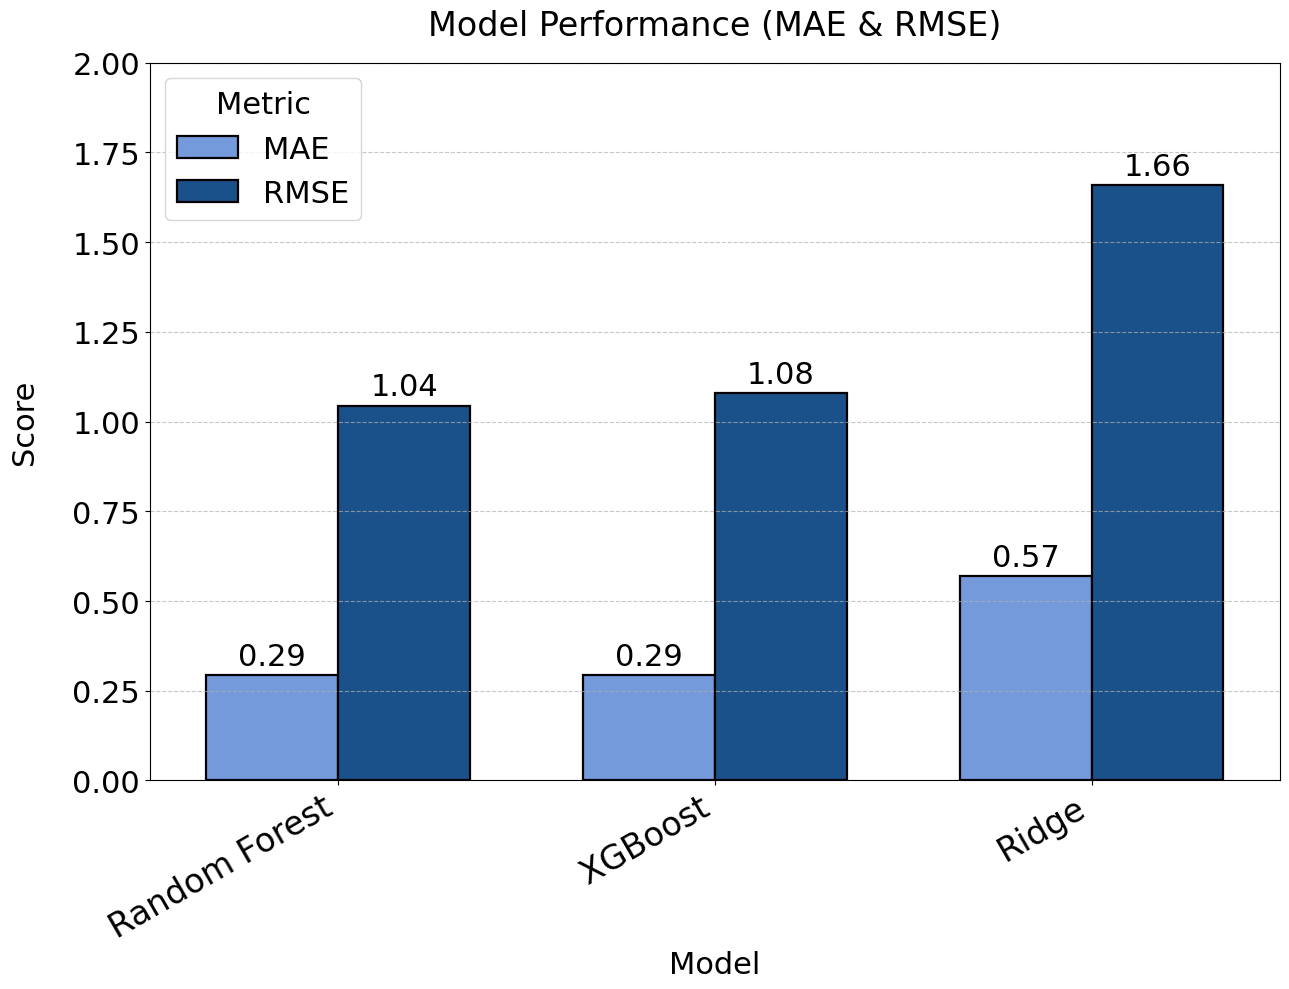

In [145]:
import matplotlib.pyplot as plt
import pandas as pd

# Model performance metrics
metrics = {
    'Random Forest': {'MAE': 0.2942, 'RMSE': 1.0447},
    'XGBoost': {'MAE': 0.2935, 'RMSE': 1.0788},
    'Ridge': {'MAE': 0.5695, 'RMSE': 1.6594}
}

df_metrics = pd.DataFrame(metrics).T.reset_index().rename(columns={'index': 'Model'})

df_melted = df_metrics.melt(id_vars='Model', var_name='Metric', value_name='Value')


plt.figure(figsize=(13, 10))
ax = sns.barplot(
    data=df_melted,
    x='Model',
    y='Value',
    hue='Metric',
    width=0.7,
    edgecolor='black',
    linewidth=1.6,
    palette=["cornflowerblue", "#08519c"]
)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', fontsize=22, padding=3)

plt.ylim(0, 2)
plt.xlabel("Model", fontsize=22)
plt.ylabel("Score", fontsize=22, labelpad=24)
plt.xticks(rotation=30, ha='right', fontsize=24)
plt.yticks(fontsize=22)
plt.legend(title="Metric", fontsize=22, title_fontsize=22)
plt.title("Model Performance (MAE & RMSE)", fontsize=24, pad=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

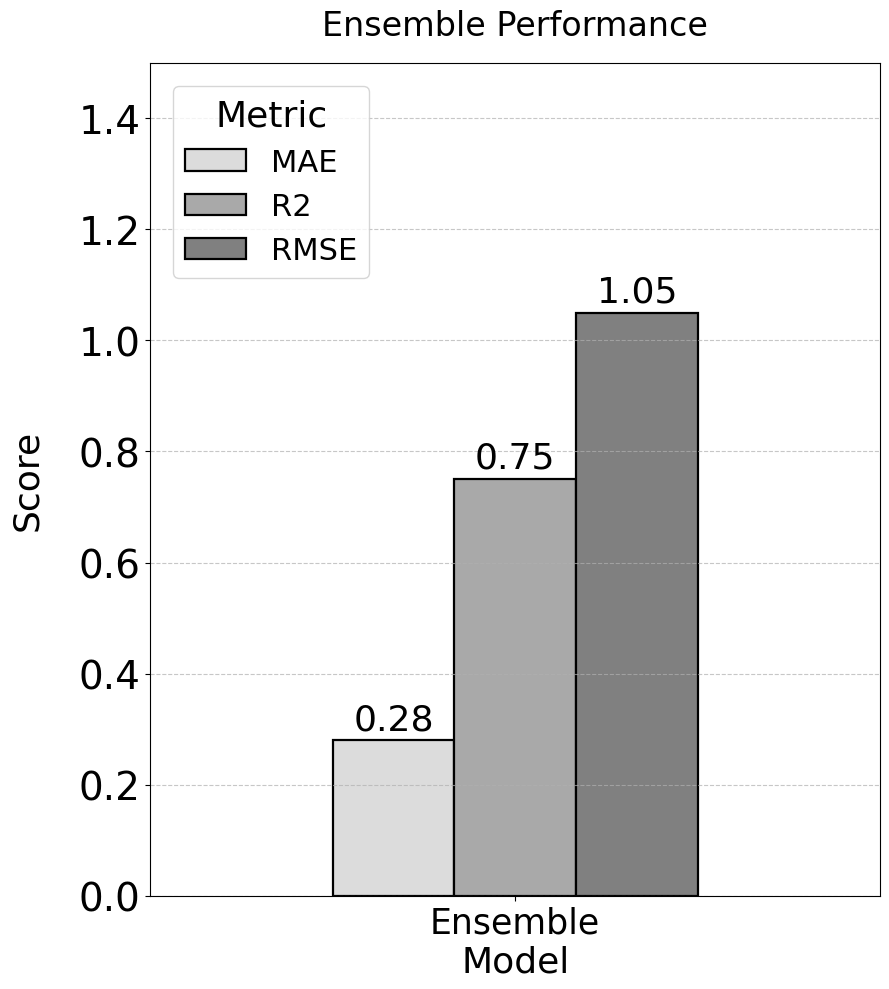

In [188]:
import matplotlib.pyplot as plt
import pandas as pd

metrics = {
    'Ensemble': {'MAE': 0.28, 'R2': 0.751, 'RMSE': 1.05}
}

df_metrics = pd.DataFrame(metrics).T.reset_index().rename(columns={'index': 'Model'})

df_melted = df_metrics.melt(id_vars='Model', var_name='Metric', value_name='Value')


plt.figure(figsize=(9, 10))
ax = sns.barplot(
    data=df_melted,
    x='Model',
    y='Value',
    hue='Metric',
    width=0.5,
    edgecolor='black',
    linewidth=1.6,
    palette=["gainsboro", "darkgray", "gray"]
)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', fontsize=26, padding=3)

plt.ylim(0, 1.5)
plt.xlabel("Model", fontsize=26)
plt.ylabel("Score", fontsize=26, labelpad=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=28)
plt.legend(
    title="Metric",
    fontsize=22,
    title_fontsize=26,
    loc='upper left',
    bbox_to_anchor=(0.01, 0.99)
)
plt.title("Ensemble Performance", fontsize=24, pad=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

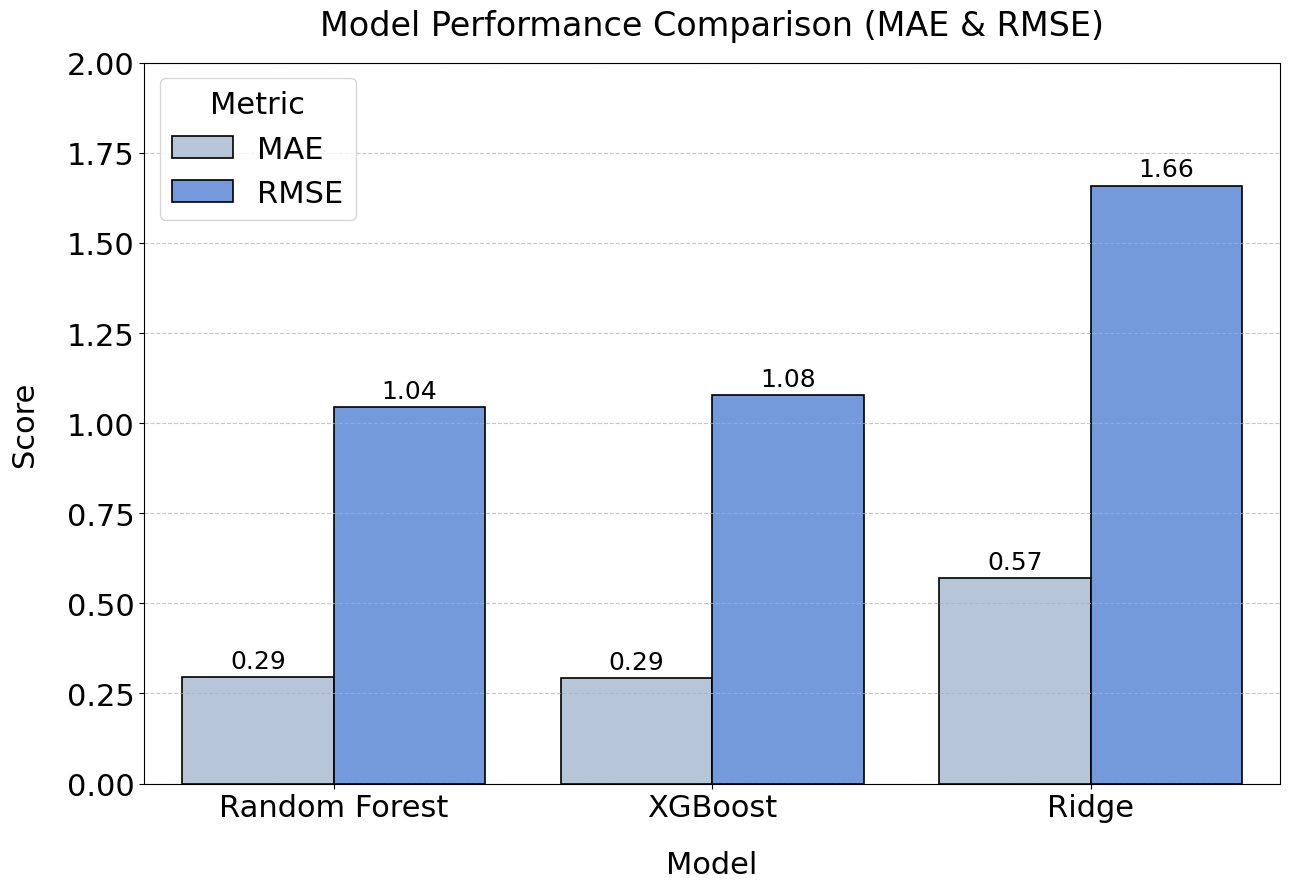

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

metrics = {
    'Random Forest': {'MAE': 0.2942, 'RMSE': 1.0447},
    'XGBoost': {'MAE': 0.2935, 'RMSE': 1.0788},
    'Ridge': {'MAE': 0.5695, 'RMSE': 1.6594}
}
df_metrics = pd.DataFrame(metrics).T.reset_index().rename(columns={'index': 'Model'})
df_melted = df_metrics.melt(id_vars='Model', var_name='Metric', value_name='Value')

plt.figure(figsize=(13, 9))
ax = sns.barplot(
    data=df_melted,
    x='Model',
    y='Value',
    hue='Metric',
    edgecolor='black',
    linewidth=1.2,
    palette=["lightsteelblue", "cornflowerblue"]
)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', fontsize=18, padding=3)

plt.ylim(0, 2)
plt.xlabel("Model", fontsize=22, labelpad=20)
plt.ylabel("Score", fontsize=22, labelpad=20)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.legend(title="Metric", fontsize=22, title_fontsize=22)
plt.title("Model Performance Comparison (MAE & RMSE)", fontsize=24, pad=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


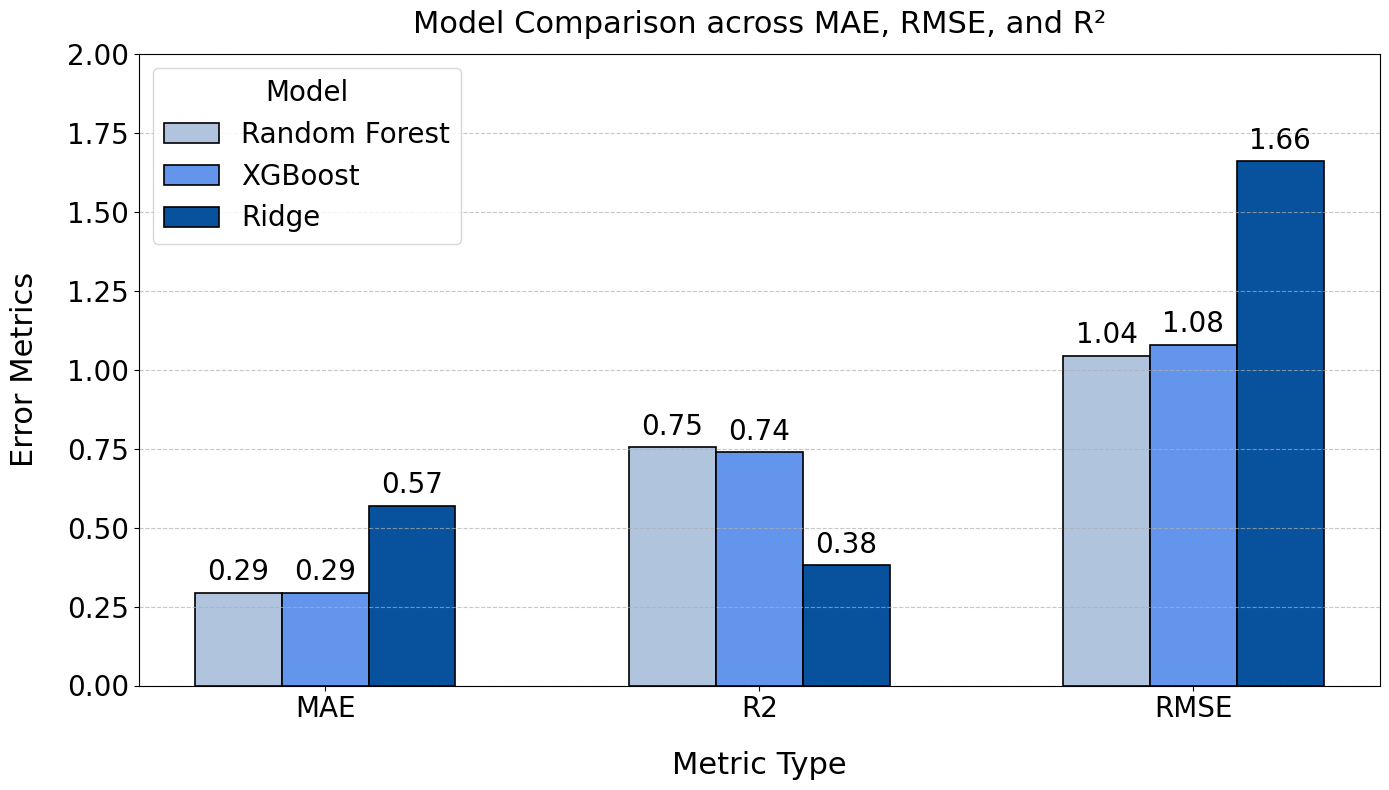

In [184]:
import matplotlib.pyplot as plt
import pandas as pd

data = {
    'Metric': ['MAE', 'MAE', 'MAE', 'RMSE', 'RMSE', 'RMSE', 'R2', 'R2', 'R2'],
    'Model': ['Random Forest', 'XGBoost', 'Ridge'] * 3,
    'Value': [0.2942, 0.2935, 0.5695, 1.0447, 1.0788, 1.6594, 0.754, 0.738, 0.38]
}
df = pd.DataFrame(data)

fig, ax = plt.subplots(figsize=(14, 8))

bar_width = 0.2
metrics = ['MAE', 'R2', 'RMSE']
models = df['Model'].unique()
x = range(len(metrics))

positions = {
    'Random Forest': [i - bar_width for i in x],
    'XGBoost': x,
    'Ridge': [i + bar_width for i in x]
}

colors = {
    'Random Forest': 'lightsteelblue',
    'XGBoost': 'cornflowerblue',
    'Ridge': '#08519c'
}

for model in models:
    values = [df[(df['Metric'] == metric) & (df['Model'] == model)]['Value'].values[0] for metric in metrics]
    bars = ax.bar(positions[model], values, width=bar_width, label=model,
           color=colors[model], edgecolor='black', linewidth=1.2)

    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.02,
            f"{height:.2f}",
            ha='center',
            va='bottom',
            fontsize=20
        )

ax.set_xticks(x)
ax.set_xticklabels(metrics, fontsize=20)
ax.set_ylabel('Error Metrics', fontsize=22, labelpad=20)
ax.set_xlabel('Metric Type', fontsize=22, labelpad=20)
ax.set_ylim(0, 2)
ax.set_title('Model Comparison across MAE, RMSE, and R²', fontsize=22, pad=15)
ax.legend(title='Model', fontsize=20, title_fontsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
